# Introducció al DataFrame

## Context de la base de dades 

El conjunt de dades que estudiaré és el de la felicitat del 2019, un dels conjunts de dades de Kaggle. Aquest conjunt de dades proporciona el rang de felicitat i la puntuació de felicitat de 155 països de tot el món basant-se en sis factors, entre els quals hi ha la família, l'esperança de vida, l'economia, la generositat, la confiança en el govern i la llibertat. La suma del valor d'aquests sis factors ens dóna la puntuació de felicitat, i com més alta és la puntuació de felicitat, més baix és el rang de felicitat. Per tant, és evident que com més gran sigui el valor de cadascun d'aquests sis factors, més gran serà el nivell de felicitat. Podem definir el significat d'aquests factors com la mesura en què aquests factors condueixen a la felicitat. 

El meu informe consta de les tres parts següents:

- Neteja
- Visualització
- Predicció

## Llibreries

He utilitzat les seguents llibreries per fer l'anàlisi:

- Pandas: Pandas és una llibreria de codi obert de Python que proporciona eines d'anàlisi i manipulació de dades. La llibreria se centra a brindar estructures de dades i operacions per manipular taules numèriques i sèries de temps.
- Numpy: La llibreria NumPy és una llibreria de codi obert per a Python que proporciona un objecte de matriu multidimensional i una sèrie de funcions matemàtiques i operacions per treballar amb aquestes matrius. Aquesta llibreria és molt utilitzada en càlcul numèric i en la manipulació de dades, especialment en el camp de la ciència de dades.
- Matplotlib: Matplotlib és una biblioteca de gràfics per al llenguatge de programació Python i la seva extensió de matemàtiques numèriques NumPy.
- Scipy: és una biblioteca de Python gratuïta i de codi obert utilitzada per a la informàtica científica i tècnica. Conté una col·lecció d'algorismes i funcions per a càlcul numèric, processament de senyals i imatges, anàlisi de dades científiques i molt més. Scipy es basa a la biblioteca NumPy.
- Seaborn: Seaborn és una biblioteca de visualització de dades de Python que es basa en Matplotlib i proporciona una interfície d'alt nivell per crear gràfics estadístics atractius i informatius. S'utilitza habitualment per visualitzar i explorar relacions dins de conjunts de dades, així com per crear gràfics més complexos i sofisticats, com ara mapes de calor, gràfics de violí i gràfics de regressió.
- Sklearn: scikit-learn, o sklearn, és una biblioteca popular de Python per a l'aprenentatge automàtic i l'anàlisi de dades. Ofereix una sèrie d'algoritmes i eines per a l'aprenentatge supervisat i no supervisat, el preprocessament i la selecció de característiques, l'avaluació i la selecció de models, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import math
import time

# 1. Neteja de les dades

El que es farà en aquest apartat es analitzar la nostra base de dades per tal de netejar dades repetides, o descartar els atributs que no ens serviràn per el nostre model.

In [2]:
dataset1 = pd.read_csv("2019.csv")
dataset1.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


A continuació, comprovarem si en la nostra base de ades hi han valors repetits i nulls, i en cas d'haver-hi els eliminarem:

In [3]:
dataset1[dataset1.duplicated(keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [4]:
dataset1.isnull().values.any()

False

Hem vist que no tenim ni dades repetides ni atributs amb valors nulls. El atributs de la nostre base de dades són:

- Classificació general: Classificació del país basada en la puntuació de felicitat.
- País o regió: Nom del país o regió.
- Puntuació: Mètrica mesurada al 2019 formulant a les persones de la mostra la pregunta: "Com qualificaria la seva felicitat en una escala de 0 a 10 en què 10 és el més feliç?".
- PIB per càpita: Mesura que el PIB contribueix al càlcul de la Puntuació de Felicitat.
- Suport social: La mesura que el suport social contribueix al càlcul de la Puntuació de Felicitat.
- Esperança de vida saludable: La mesura que l'Esperança de vida contribueix al càlcul de la Puntuació de Felicitat.
- Llibertat per prendre decisions a la vida: Mesura en què la Llibertat ha contribuït al càlcul de la Puntuació de Felicitat.
- Generositat: Mesura utilitzada per mostrar l'acte de ser generós
- Percepció de la corrupció: Mesura que la Percepció de la corrupció contribueix a la Puntuació de Felicitat.

La nostra variable objectiu serà predir el score de la felicitat.

In [5]:
print("Els atributs de la nostra BD: ", np.array(dataset1.columns))

Els atributs de la nostra BD:  ['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'Generosity' 'Perceptions of corruption']


Per al nostre model, les dades com el overall rankin o el país no ens serviràn, per tant les elimino de la base de dades:

In [6]:
dataset1.head(5)
dataset = dataset1.drop(["Country or region", "Overall rank"], axis=1)
dataset.head(5)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Eliminació dels outliers

El gràfic mostra que hi ha valors atípics a les columnes "Suport social", "Esperança de vida sana", "Llibertat d'elecció", "Generositat" i "Percepció de la corrupció".

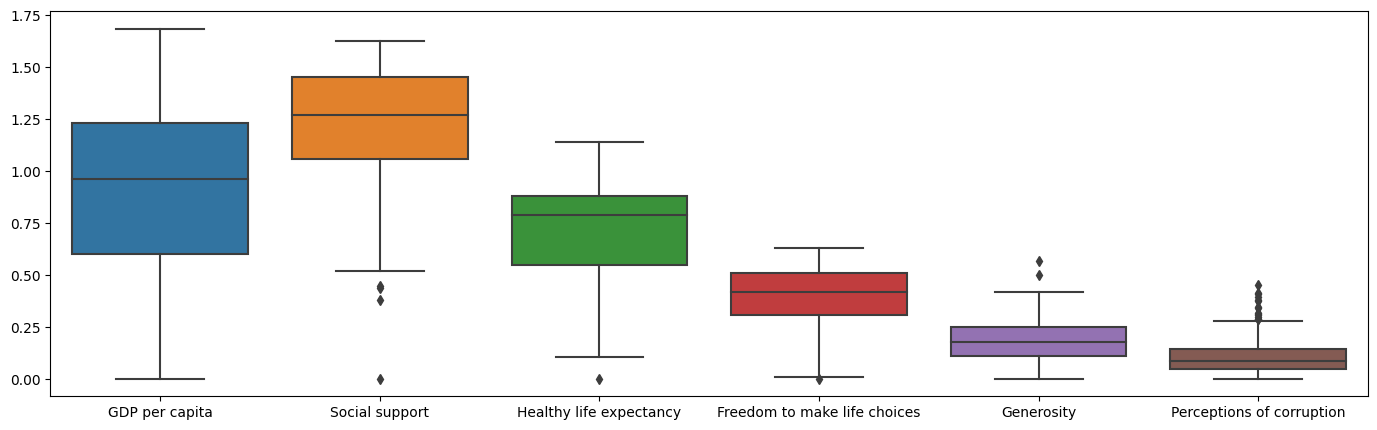

In [7]:
col_list=['GDP per capita',
   'Social support', 'Healthy life expectancy',
   'Freedom to make life choices', 'Generosity',
   'Perceptions of corruption']

plt.figure(figsize=(17,5))
sns.boxplot(data=dataset[col_list])
# plt.xticks(rotation=90)
plt.show()

A continuació es mostra una funció per obtenir valors atípics de cada columna:

In [8]:
def get_outlier(data, weight=1.5):
    lower=np.percentile(data,25)
    upper=np.percentile(data,75)
    iqr=upper-lower
    l=lower-weight*iqr
    u=upper+weight*iqr
    return {
        "lower":l,
        "upper":u
    }
dataset_o=dataset.copy()
for col in col_list:
    o_info=get_outlier(dataset[col])
    print(col,len(dataset[(dataset[col]>o_info["upper"]) | (dataset[col]<o_info["lower"])]))
    dataset_o=dataset_o[(dataset_o[col]<o_info["upper"]) & (dataset_o[col]>o_info["lower"])]

GDP per capita 0
Social support 4
Healthy life expectancy 1
Freedom to make life choices 1
Generosity 2
Perceptions of corruption 14


Eliminem els valors atípics:

In [9]:
dataset_o.reset_index(inplace=True)

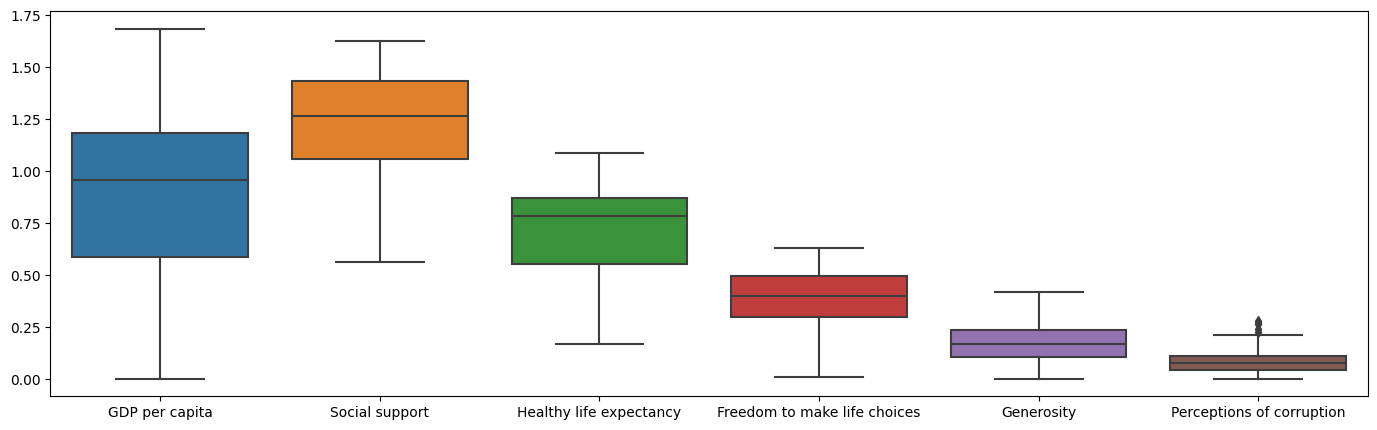

In [10]:
plt.figure(figsize=(17,5))
sns.boxplot(data=dataset_o[col_list])
# plt.xticks(rotation=90)
plt.show()

# 2. Visualització de les dades

### Correlació de les dades 

En el mapa de correlació podem veure que el score, té una gran correlació amb el GDP per capita és a dir, amb la economia, amb el suport social, i la esperança de vida saludable. També està relacionat en menor part per la llibertat i la corrupció.

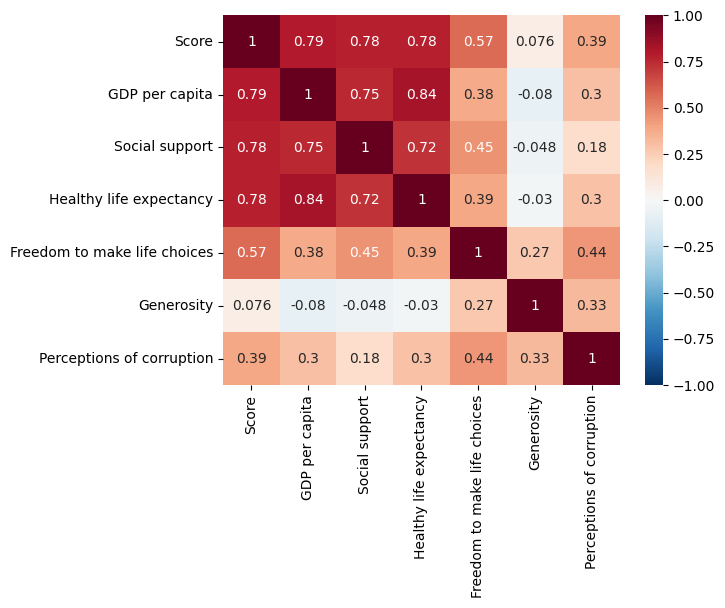

In [11]:
def correlation_matrix(data):
    plt.figure()
    sns.heatmap(data.corr(), center=0, annot=True, vmin=-1, vmax=1, cmap="RdBu_r")
    plt.savefig("correlations.png")
    
correlation_matrix(dataset)

### PAIRPLOT



Fem la comparativa dels atributs per parelles. El que més ens interessa observar es com es comporta el nostre atribut a predir, el score, amb els altres atributs:

Podem veure que com hem observat a la matriu de correlació el score està determinat per el GDP per capita, Suport Social i la esperança de vida, i els altres atributs estàn més dispersos, és a dir per exemple, un país amb molta corrupció podria estar dels millors puntuats en quant a felicitat.

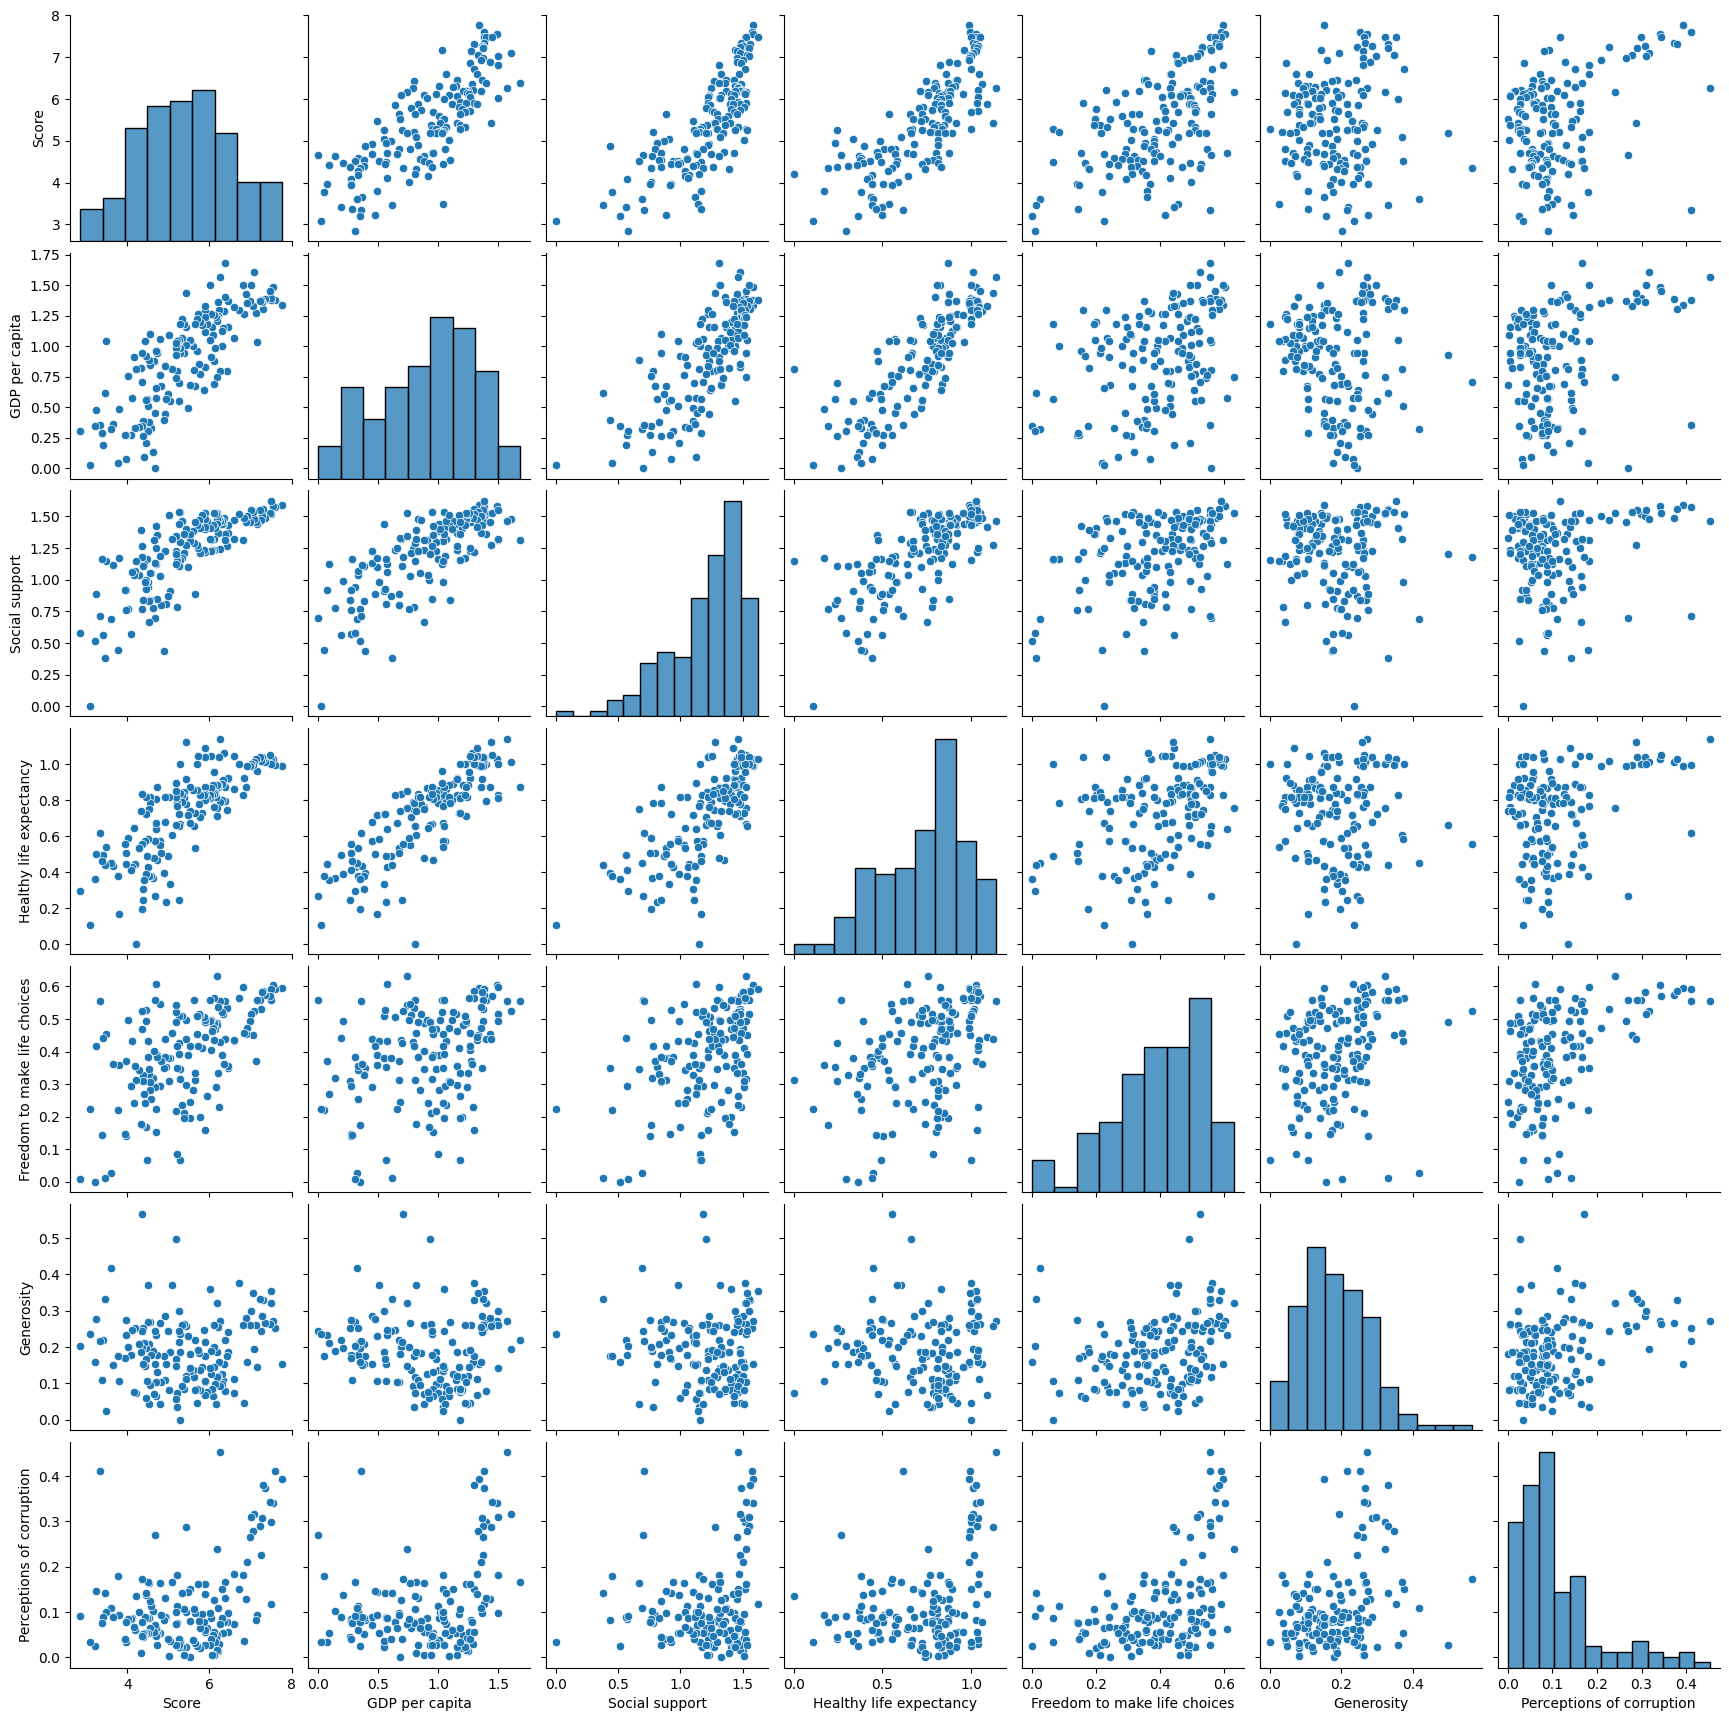

In [12]:
sns.pairplot(dataset)

### Comparativa de països 

També he volgut mostrar els gràfics dels països més feliços, els menys feliços, els que tenen més diners i els que tenen més suport social:

<AxesSubplot: xlabel='Social support', ylabel='Country or region'>

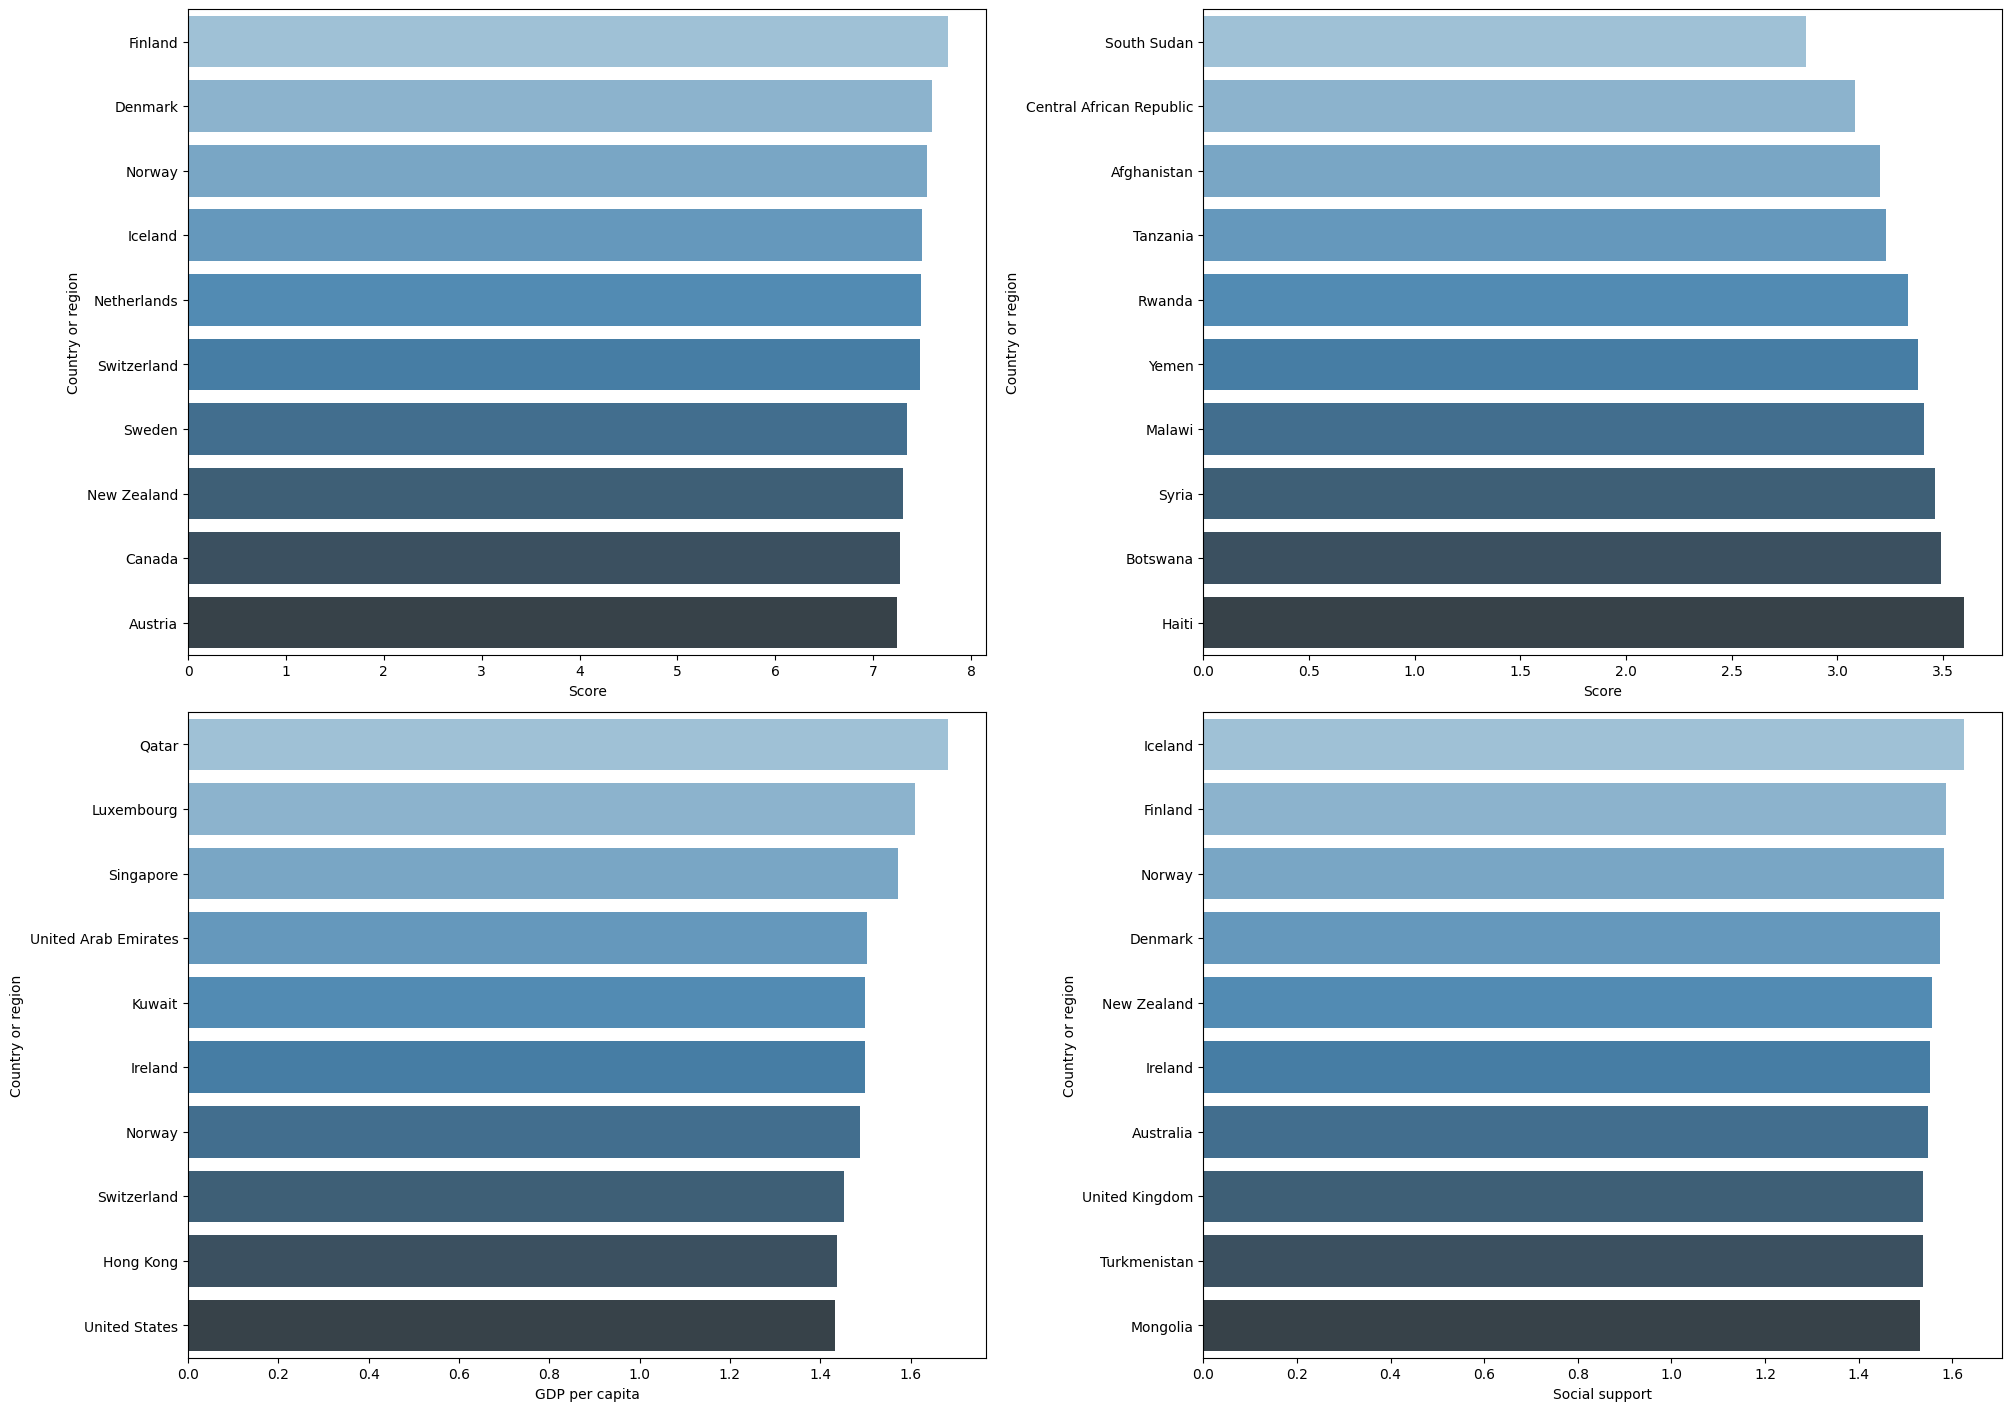

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(20,14))
sns.barplot(x='Score',y='Country or region',data=dataset1.nlargest(10,'Score'),ax=axes[0][0],palette="Blues_d")
sns.barplot(x='Score',y='Country or region',data=dataset1.nsmallest(10,'Score'),ax=axes[0][1],palette="Blues_d")
sns.barplot(x='GDP per capita',y='Country or region',data=dataset1.nlargest(10,'GDP per capita'),ax=axes[1][0],palette="Blues_d")
sns.barplot(x='Social support',y='Country or region',data=dataset1.nlargest(10,'Social support'),ax=axes[1][1],palette="Blues_d")



Per curiositat he mirat on es trobaria Espanya en aquest ranking i els diferents valors dels atributs que té:

In [14]:
dataset1.loc[dataset1['Country or region']=='Spain']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079


### Dispersió dels atributs

En el seguent gràfic podem veure com aquells paisos que tenen un major score, són aquells que també tenen més GDP per capita, suport social o més esperança de vida.

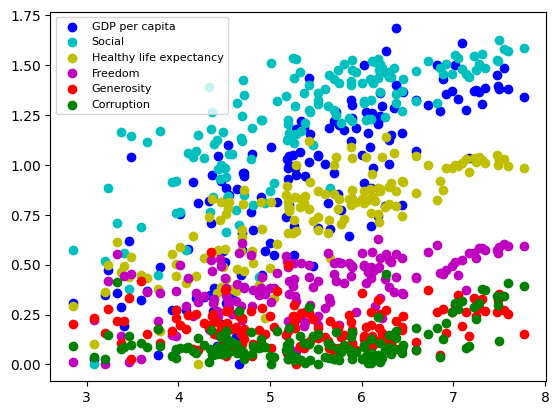

In [15]:
colors = ['b', 'c', 'y', 'm', 'r', 'g']

lo = plt.scatter(dataset.values[:,0], dataset.values[:,1], color=colors[0])
ll = plt.scatter(dataset.values[:,0], dataset.values[:,2], color=colors[1])
l  = plt.scatter(dataset.values[:,0], dataset.values[:,3], color=colors[2])
a  = plt.scatter(dataset.values[:,0], dataset.values[:,4], color=colors[3])
h  = plt.scatter(dataset.values[:,0], dataset.values[:,5], color=colors[4])
hh = plt.scatter(dataset.values[:,0], dataset.values[:,6], color=colors[5])


plt.legend((lo, ll, l, a, h, hh),
           ('GDP per capita', 'Social', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption'),
           fontsize=8)

plt.show()

# 3. Predicció del atribut objectiu

### Preparació de les dades

En primer lloc hem de crear les dades i entrenar els models per predir el score de la felicitat. 

In [16]:
x = dataset.values[:,1:7]
y = dataset.values[:,0]

Hem de dividir les dades en un conjunt de test i un conjunt de train:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

### Creació dels models

En aquest apartat farem ús de tres models (Regressió Lineal, Decision Tree i Random Forest) amb els paràmetres per defecte, per després comparar-los i veure quin model ens dona millors resultats:

In [18]:
model_dic={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}
for model_n in model_dic.keys():
    model = model_dic[model_n]
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    print("======")
    print("Model:", model_n)
    print("Score:", score)
    print("MSE:", mse)
    st=time.time()
    model.predict(x_test)
    predict_time=time.time()-st
    print("Predict Time:", predict_time)

Model: LinearRegression
Score: 0.7530631504321611
MSE: 0.2390586995465021
Predict Time: 0.0
Model: DecisionTreeRegressor
Score: 0.5538300864782459
MSE: 0.43193553125
Predict Time: 0.0
Model: RandomForestRegressor
Score: 0.7609175073110189
MSE: 0.2314549241499992
Predict Time: 0.007935047149658203


Comparant els resultats obtinguts per els tres models, podem observar que el model que ens dona un major resultat es el del RandomForest, tot i que fallarà alhora de predir algún punt. Podem observar que la Regressió Lineal també dona un resultat molt semblant al RandomForest


### Búsqueda d'hiperparàmetres 

Un cop hem avaluat el rendiment de cadascun dels tres models amb els seus paràmetres per defecte, ara volem trobar quina combinació de paràmetres maximitza el rendiment de cada model. Per fer-ho, utilitzarem dues funcions de cerca de paràmetres conegudes i fàcils d'usar: GridSearchCV i RandomizedSearchCV.

Per utilitzar aquestes funcions, primer hem de crear un diccionari que contingui els diferents paràmetres i valors que volem provar. La funció llavors trobarà la combinació de valors que produeix el millor rendiment.

In [19]:
param_linearreg = {'fit_intercept': [True, False],
                   'copy_X': [True, False],
                   'positive': [True, False]}
param_decisiontree = {"splitter":["best","random"],
                      "max_depth" : [1,2,3,4,5,7,9,11,13,15,20],
                      "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
                      "max_features":["auto","log2","sqrt",None],
                      "max_leaf_nodes":[None,10,20,50,80,100,250,500]}
param_randomforest = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': np.arange(2, 5),
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}



In [20]:
model_dic={
    "LinearRegression":GridSearchCV(LinearRegression(), param_linearreg, cv=3, verbose=2, n_jobs=-1),
    "DecisionTreeRegressor":GridSearchCV(DecisionTreeRegressor(), param_decisiontree, cv=3, verbose=2, n_jobs=-1),
    "RandomForestRegressor":RandomizedSearchCV(RandomForestRegressor(), param_randomforest, 
                              n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
}
for model_n in model_dic.keys():
    model = model_dic[model_n]
    model.fit(x_train,y_train)
    print("=====================================")
    print("Model:", model_n)
    print("Score:", model.score(x_test,y_test))
    print("train Score:", model.score(x_train,y_train))
    print("MSE:", mean_squared_error(y_test, model.predict(x_test)))
    print("Els millors parametres: " + str(model.best_params_))
    st=time.time()
    model.predict(x_test)
    predict_time=time.time()-st
    print("Predict Time:", predict_time)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: LinearRegression
Score: 0.753063150432161
train Score: 0.7817592572505803
MSE: 0.2390586995465022
Els millors parametres: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Predict Time: 0.0
Fitting 3 folds for each of 4224 candidates, totalling 12672 fits
Model: DecisionTreeRegressor
Score: 0.2937433798985366
train Score: 0.7008733124557933
MSE: 0.6837245613323526
Els millors parametres: {'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Predict Time: 0.0
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: RandomForestRegressor
Score: 0.7883345003776562
train Score: 0.9732278792543814
MSE: 0.20491262914843783
Els millors parametres: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Predict Time: 0.018164634704589844


Podem observar que dels tres models, el que ha donat millors resultats és el del RandomForest. A la regressió ha estat el model que menys paràmetres hem provat i és per això que és el model que menys millora. Tot i això la búsqueda d'hiperparàmetres ens millora els resultats pero no varien molt dels ja obtenits amb els paràmetres per defecte.

# CONCLUSIONS

Un cop creats els models i comparar-los hem pogut veure que:
- Hi han diferents factors que estàn relacionats amb la felicitat de les persones com seria l'economia, el suport social, la experança de vida i altres factors menys destacats com per exemple la corrupció al país.
- Amb paràmetres per defecte els millors models per predir la felicitat han estat la Regressió Lineal i el Random Forest.
- Hem pogut observar que amb els millors hiperparàmetres hem pogut millorar una mica els rendiments de tots els models, pero gairebé son els mateixos.
- El millors models per tant han estat el de la Regressió Lineal i el Random Forest.